<a href="https://colab.research.google.com/github/shreyasbhojane10/Artificial-Intelligence/blob/main/CIFAR_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dropout,Dense
from keras.datasets import cifar10

In [2]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
xtrain.shape

(50000, 32, 32, 3)

In [4]:
xtest.shape

(10000, 32, 32, 3)

In [5]:
ytrain.shape

(50000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
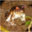

In [6]:
xtrain[0]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]], dtype=uint8)
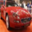

In [7]:
xtrain[5]

In [8]:
ytrain_new = ytrain.flatten()
len(set(ytrain_new))

10

#Data Preprocessing

In [9]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255
print(xtrain_scl[0],'\n',xtest_scl[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


Here in above output eacg [] contains an imege

In [10]:
from keras.utils import to_categorical
ytrain_scl,ytest_scl = to_categorical(ytrain),to_categorical(ytest)

In [11]:
ytrain[0]

array([6], dtype=uint8)

In [12]:
ytrain[3]

array([4], dtype=uint8)

In [13]:
ytrain_scl[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [14]:
ytrain_scl[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


#set(ytrain)

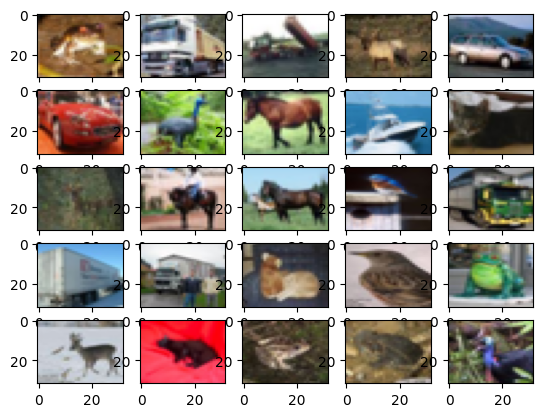

In [15]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(xtrain[k], aspect='auto') # i represents rows , j represents columns
        k += 1

plt.show()

In [16]:
xtrain_scl.shape

(50000, 32, 32, 3)

In [17]:
model = Sequential()
# add the input layer
model.add(Input(shape=(32,32,3),))
# Add the convolution layer
model.add(Convolution2D(32,kernel_size=(3,3),activation="relu")) # padding="valid"
# Add the maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Add another convolution layer
model.add(Convolution2D(64,kernel_size=(3,3),activation="relu"))
# Add another maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Add the Flattern layer
model.add(Flatten())
# Add the Dropout layer
model.add(Dropout(rate=0.3))
# Add the Output layer
model.add(Dense(units=10,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model2 = Sequential()
# add the input layer
model2.add(Input(shape=(32,32,3),))
# Add the convolution layer
model2.add(Convolution2D(32,kernel_size=(3,3),padding="same",activation="relu"))
# Add the maxpooling layer
model2.add(MaxPooling2D(pool_size=(2,2)))
# Add another convolution layer
model2.add(Convolution2D(64,kernel_size=(3,3),padding="same",activation="relu"))
# Add another maxpooling layer
model2.add(MaxPooling2D(pool_size=(2,2)))
# Add the Flattern layer
model2.add(Flatten())
# Add the Dropout layer
model2.add(Dropout(rate=0.3))
# Add the Output layer
model2.add(Dense(units=10,activation="softmax"))

In [20]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,362 (235.79 KB)

 Trainable params: 60,362 (235.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
from keras.callbacks import EarlyStopping
hist = model.fit(xtrain_scl,ytrain_scl,validation_split=0.1,epochs=15,callbacks=[EarlyStopping(monitor="val_loss",patience=10)])

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3646 - loss: 1.7466 - val_accuracy: 0.5486 - val_loss: 1.2879
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5495 - loss: 1.2759 - val_accuracy: 0.6162 - val_loss: 1.1258
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5983 - loss: 1.1486 - val_accuracy: 0.6138 - val_loss: 1.1107
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6268 - loss: 1.0781 - val_accuracy: 0.6624 - val_loss: 1.0055
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6473 - loss: 1.0238 - val_accuracy: 0.6726 - val_loss: 0.9619
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6589 - loss: 0.9775 - val_accuracy: 0.6904 - val_loss: 0.9186
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6695 - loss: 0.9507 - val_accuracy: 0.6482 - val_loss: 1.0035
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6848 - loss: 0.9237

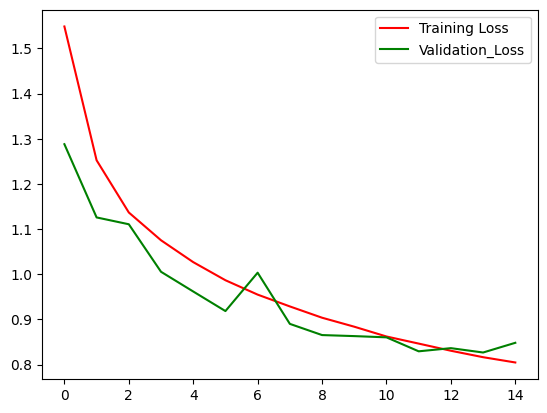

In [23]:
plt.plot(hist.history['loss'], label='Training Loss', color='red')
plt.plot(hist.history['val_loss'], label='Validation_Loss', color='green')
plt.legend()

#Evaluation Metrics

In [24]:
model.evaluate(xtrain_scl,ytrain_scl)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7614 - loss: 0.6891


[0.7084261178970337, 0.7558000087738037]

In [25]:
model.evaluate(xtest_scl,ytest_scl)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7026 - loss: 0.8740


[0.8768071532249451, 0.6990000009536743]

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [27]:
ytest[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [28]:
ytest_probs = model.predict(xtest)
ytest_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.7151663e-17, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.1118845e-20, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [29]:
ytest_preds = np.argmax(ytest_probs,axis=1)
ytest_preds[:5]

array([8, 1, 1, 0, 8])

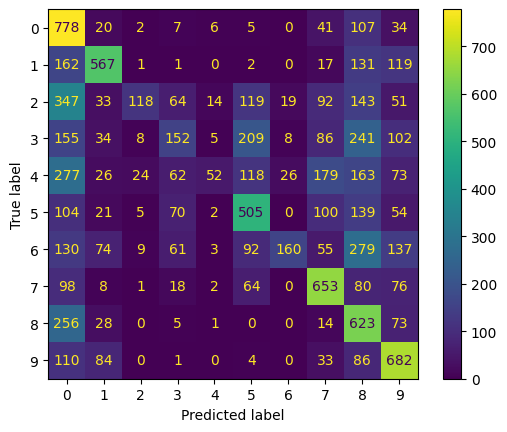

In [30]:
ConfusionMatrixDisplay.from_predictions(ytest,ytest_preds)

In [31]:
print(classification_report(ytest,ytest_preds))

              precision    recall  f1-score   support

           0       0.32      0.78      0.46      1000
           1       0.63      0.57      0.60      1000
           2       0.70      0.12      0.20      1000
           3       0.34      0.15      0.21      1000
           4       0.61      0.05      0.10      1000
           5       0.45      0.51      0.48      1000
           6       0.75      0.16      0.26      1000
           7       0.51      0.65      0.58      1000
           8       0.31      0.62      0.42      1000
           9       0.49      0.68      0.57      1000

    accuracy                           0.43     10000
   macro avg       0.51      0.43      0.39     10000
weighted avg       0.51      0.43      0.39     10000



In [32]:
import cv2
def predict_images(model,image_path):
  img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  img_scl = img.astype("float32")/255
  img_scl = img_scl.reshape(1,28,28,1) # 1 represents gray scale image. if its colored, use 3-(1,28,28,3)
  probs = model.predict(img_scl)
  preds = np.argmax(probs,axis=1)
  return preds